# 타이타닉 생존자 예측:디카프리오는 정말 살 수 없었을까?

# 문제 정의하기
– 타이타닉 탑승자 명단을 통해 생존자 분석

– 디카프리오는 정말 살 수 없었을까?


– 1912년 4월 10일 영국 Southampton에서 출발하고 5일 후, 1912년 4월 15일 침몰


– 이진 분류 예제에 적합한 데이터셋 중 6개 변수, 1개 변수는 생존 결과로 1이면 생존, 0이면 사망
타이타닉 생존자 예측 데이터 셋

 → 6개 변수를 독립변수로 보고 생존 유무를 예측하는 이진 분류 문제로 정의


 #survived : 생존 유무 -> 정답
#sex : 성별
#age : 나이
#sibsp : 형제 혹은 부부의 수
#parch : 부모, 혹은 자녀의 수
#fare : 지불한 운임

## 데이터 준비하기

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_excel('/content/titanic.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [28]:
df.info() # 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## 타이타닉 탑승자 명단을 통해 생존자 분석 생존률 확인


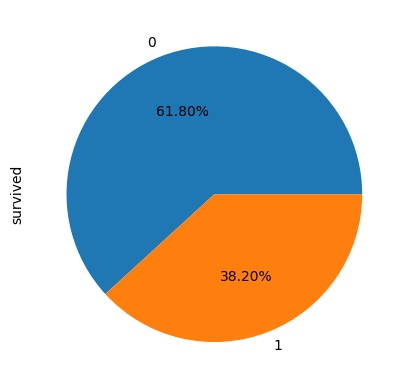

In [29]:
df['survived'].value_counts().plot.pie(autopct='%.2f%%'); # 생존자, 사망자

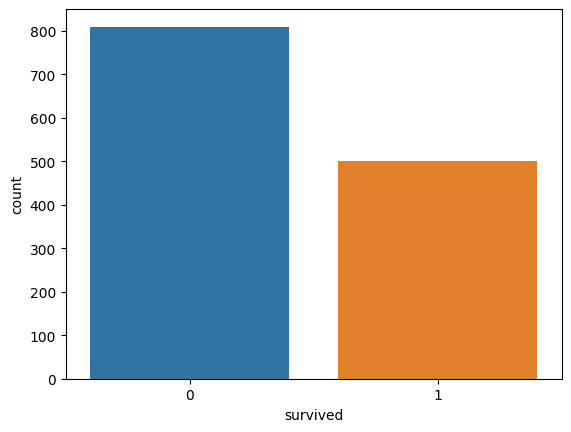

In [30]:
sns.countplot(data = df, x = 'survived') # 생존자, 사망자
plt.show()

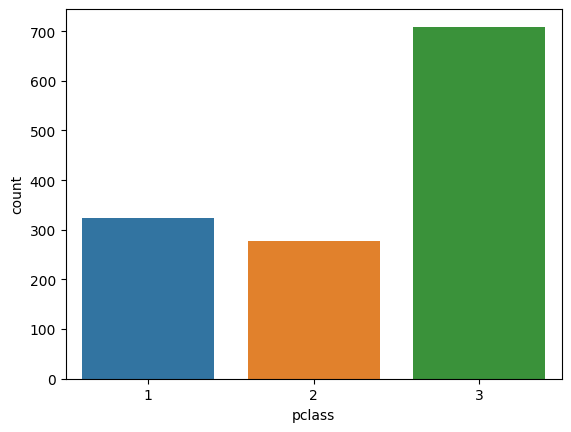

In [31]:
sns.countplot(data = df, x = 'pclass') # 등급별
plt.show()

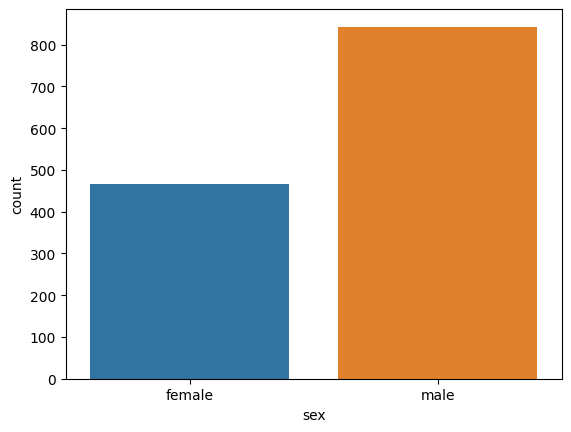

In [32]:
sns.countplot(data = df, x = 'sex') # 성별
plt.show()

### 그래프를 통해 확인한 결과


*   1등석의 생존율이 높은편
*   여성의 생존율이 높은편



## 데이터 전처리 작업

### NAN 데이터 제거

In [33]:
df.info() # 확인작업

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [34]:
df.isna().sum() # null 데이터 수 눈으로 확인해주기.

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [35]:
df = df.dropna(subset=['age','fare'], how='any', axis=0) # null 데이터 제거 (값을 제거)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 122.5+ KB


### 필요한 칼럼 추출

In [36]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,0,1,female,2.0000,1,2,151.5500
3,0,1,male,30.0000,1,2,151.5500
4,0,1,female,25.0000,1,2,151.5500


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1045 non-null   int64  
 1   pclass    1045 non-null   int64  
 2   sex       1045 non-null   object 
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   int64  
 5   parch     1045 non-null   int64  
 6   fare      1045 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.3+ KB


### 성별 0, 1 로 원핫 인코딩

In [38]:
df['sex'] = np.where(df['sex'] == 'male', 0, 1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,1,29.0000,0,0,211.3375
1,1,1,0,0.9167,1,2,151.5500
2,0,1,1,2.0000,1,2,151.5500
3,0,1,0,30.0000,1,2,151.5500
4,0,1,1,25.0000,1,2,151.5500


### float 로 형변환 작업

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1045 non-null   int64  
 1   pclass    1045 non-null   int64  
 2   sex       1045 non-null   int64  
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   int64  
 5   parch     1045 non-null   int64  
 6   fare      1045 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 65.3 KB


In [40]:
df = df.astype('float')

In [41]:
df.info() # 모두 실수형으로 변한 것을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1045 non-null   float64
 1   pclass    1045 non-null   float64
 2   sex       1045 non-null   float64
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   float64
 5   parch     1045 non-null   float64
 6   fare      1045 non-null   float64
dtypes: float64(7)
memory usage: 65.3 KB


## 데이터셋 분리

### 6개의 feature와 1개의 target으로 설정

In [43]:
X = df[['pclass',	'sex', 'age', 'sibsp', 'parch','fare']]
y= df['survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=7) # 훈련 셋 940건, 테스트 셋 105건 (10%)

In [46]:
X_train.shape

(940, 6)

In [47]:
X_test.shape

(105, 6)

In [49]:
y_train.shape

(940,)

In [50]:
y_test.shape

(105,)

## 모델 구성하기


*   속성이 6개이기 때문에 입력 뉴런을 6개이고, Dense 레이어 개수 255, 활성화 함수 relu
*   마지막 출력 Dense 레이어 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개, 활성화 함수 sigmoid


In [52]:
model = Sequential()

model.add(Dense(255, input_shape=(6,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## 모델 설정하기

In [53]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

## 모델 학습시키기

In [54]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 1ms/step - loss: 0.2567 - acc: 0.6372
Epoch 2/300
30/30 [==============================] - 0s 1ms/step - loss: 0.2214 - acc: 0.6755
Epoch 3/300
30/30 [==============================] - 0s 1ms/step - loss: 0.2017 - acc: 0.7064
Epoch 4/300
30/30 [==============================] - 0s 1ms/step - loss: 0.2000 - acc: 0.7074
Epoch 5/300
30/30 [==============================] - 0s 1ms/step - loss: 0.1946 - acc: 0.7213
Epoch 6/300
30/30 [==============================] - 0s 1ms/step - loss: 0.1907 - acc: 0.7404
Epoch 7/300
30/30 [==============================] - 0s 1ms/step - loss: 0.1700 - acc: 0.7532
Epoch 8/300
30/30 [==============================] - 0s 1ms/step - loss: 0.1733 - acc: 0.7532
Epoch 9/300
30/30 [==============================] - 0s 1ms/step - loss: 0.1654 - acc: 0.7585
Epoch 10/300
30/30 [==============================] - 0s 1ms/step - loss: 0.1617 - acc: 0.7766
Epoch 11/300
30/30 [==============================] - 0s 1m

## 모델 평가하기


*   model.evaluate(X_test, y_test)
*   classification_report
*   accuracy, precision, recall, f1-score
*   roc_curve


### model.evaluate(X_test, y_test)

In [55]:
scores = model.evaluate(X_test, y_test)
print("%s : %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.1450 - acc: 0.8476
acc : 84.76%


### classification_report

In [66]:
from sklearn import metrics

y_pred = model.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1, 0) # 0.5보다 크면 1, 작으면 0

report = metrics.classification_report(y_test, pred_class)
print(report)

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88        62
         1.0       0.94      0.67      0.78        43

    accuracy                           0.85       105
   macro avg       0.87      0.82      0.83       105
weighted avg       0.86      0.85      0.84       105



### accuracy, precision, recall, f1-score

In [67]:
print('accuracy : ', metrics.accuracy_score(y_test, pred_class))
print('precision : ', metrics.precision_score(y_test, pred_class))
print('recall : ', metrics.recall_score(y_test, pred_class))
print('f1 : ', metrics.f1_score(y_test, pred_class))

accuracy :  0.8476190476190476
precision :  0.9354838709677419
recall :  0.6744186046511628
f1 :  0.7837837837837838


### roc_curve

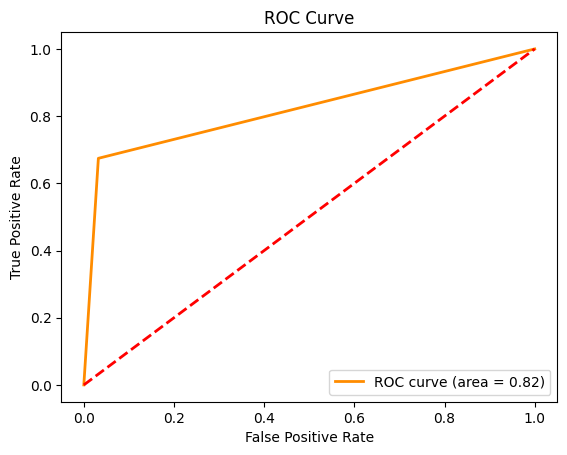

In [68]:
from sklearn.metrics import roc_curve, auc

fpr_A, tpr_A, thr_A = roc_curve(y_test, pred_class)

auc_A = auc(fpr_A, tpr_A)

import matplotlib.pyplot as plt

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc_A)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show() # 우수한 모델은 왼쪽에 붙어서 그려짐.

## 모델 예측하기


*   3등실 탑승, 남성, 19살, 형제없고, 부모나 자녀없음, 싼 가격으로 표를 삼
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
*   1등실 탑승, 여성, 17살,  운임은 비싸게 주었고, 부모와 함께 탑승하고, 약혼자도 있었다
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)


In [69]:
# 디카프리오
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)

d_predict = model.predict(dicaprio) # 어차피 죽을 운명
print('디카프리오의 생존 예측 : %.2f%%' %(d_predict * 100)
)
# 원슬렛
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)
w_predict = model.predict(winslet)
print("윈슬렛의 생존 예측 : %.2f%%" %(w_predict * 100))

1/1 [==============================] - 0s 81ms/step
디카프리오의 생존 예측 : 11.37%
1/1 [==============================] - 0s 29ms/step
윈슬렛의 생존 예측 : 99.97%
